## Upper Confidence Bound (UCB)

### Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [3]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

### Implementing UCB

In [6]:
import math

N = 10000
d = 10
ads_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selection[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

### Visualising the results

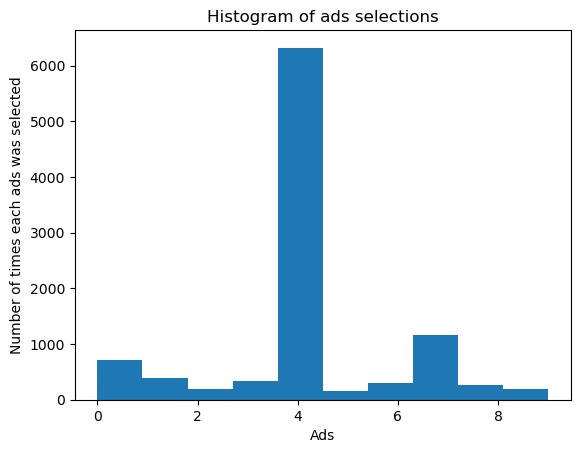

In [7]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ads was selected")
plt.show()